In [1]:
import math
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convolution(matrix1, matrix2):
    """
    Perform the convolution of two matrices.
    
    :param matrix1: the first argument of the convolution.
    :param matrix2: the second argument of the convolution.
    :return: the result of the convolution.
    """
    
    # Pad the first matrix with zeros
    pad = (matrix2.shape[0] // 2, matrix2.shape[1] // 2)
    zeros = np.zeros((matrix1.shape[0] + 2 * pad[0], matrix1.shape[1] + 2 * pad[1]))
    zeros[pad[0]: -pad[0], pad[1]: -pad[1]] = matrix1
    matrix1 = zeros
    
    # Perform the convolution
    matrix2_flipped = np.flip(np.flip(matrix2, axis=0), axis=1)
    result = np.empty((matrix1.shape[0] - 2 * pad[0], matrix1.shape[1] - 2 * pad[1]))
    for i in range(0, matrix1.shape[0] - 2 * pad[0]):
        for j in range(0, matrix1.shape[1] - 2 * pad[1]):
            result[i][j] = np.sum(
                matrix1[i: i + matrix2_flipped.shape[0], j: j + matrix2_flipped.shape[1]] * matrix2_flipped)
    return result


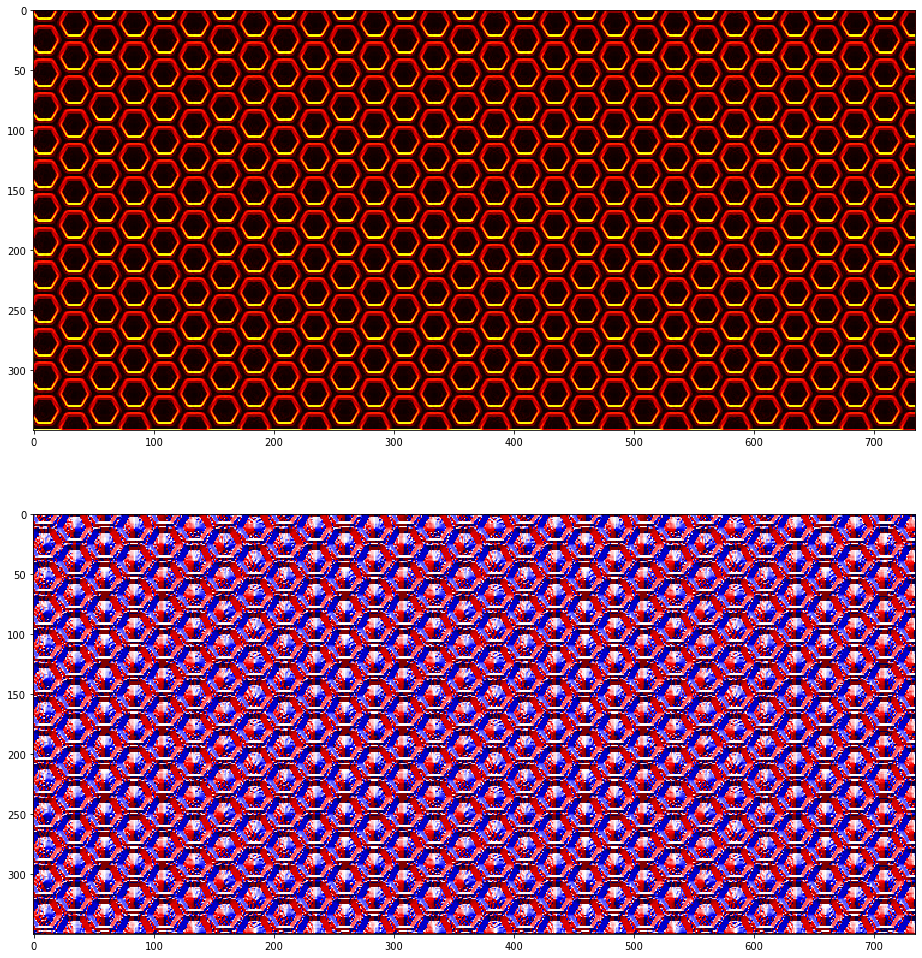

In [3]:
# Load the image to filter and convert it to greyscale
metalgrid_color = skimage.io.imread('metalgrid.jpg')
metalgrid_gray = skimage.color.rgb2gray(metalgrid_color)

# Define the Sobel kernel to be used
k = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Get the horizontal and vertical gradients
x = convolution(metalgrid_gray, k)
y = convolution(metalgrid_gray, k.T)

# Calculate magnitude and phase
metalgrid_magnitude = np.sqrt(x ** 2 + y ** 2)
metalgrid_phase = np.rad2deg(np.arctan2(y, x))

# Shift and scale the magnitude so that it fits in [0:1]
metalgrid_magnitude = (metalgrid_magnitude - np.min(metalgrid_magnitude)) \
    / (np.max(metalgrid_magnitude) - np.min(metalgrid_magnitude))

# Show the images
f, axarr = plt.subplots(2, 1, figsize=(17, 17))
axarr[0].imshow(metalgrid_magnitude, cmap='hot')
axarr[1].imshow(metalgrid_phase , cmap='seismic')


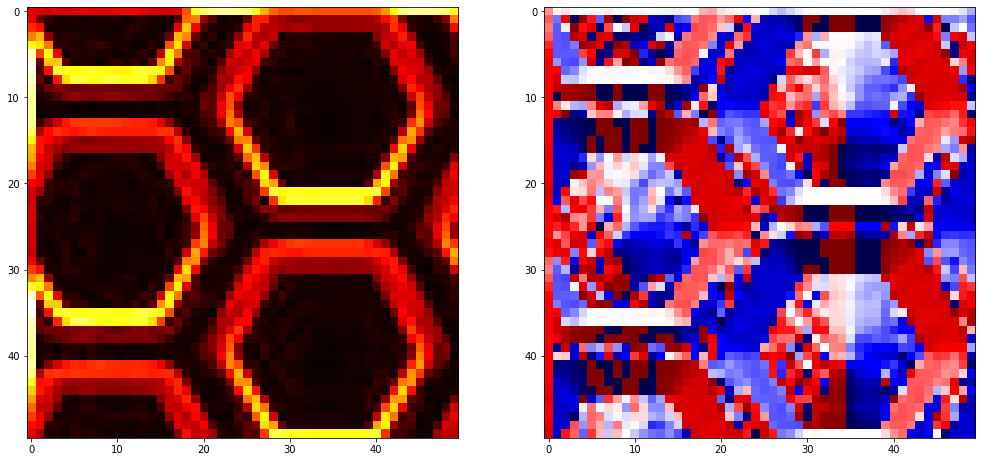

In [4]:
# Show a section of the image, considering that it's "periodic"
f, axarr = plt.subplots(1, 2, figsize=(17, 10))
axarr[0].imshow(metalgrid_magnitude[:50, :50], cmap='hot')
axarr[1].imshow(metalgrid_phase[:50, :50], cmap='seismic')

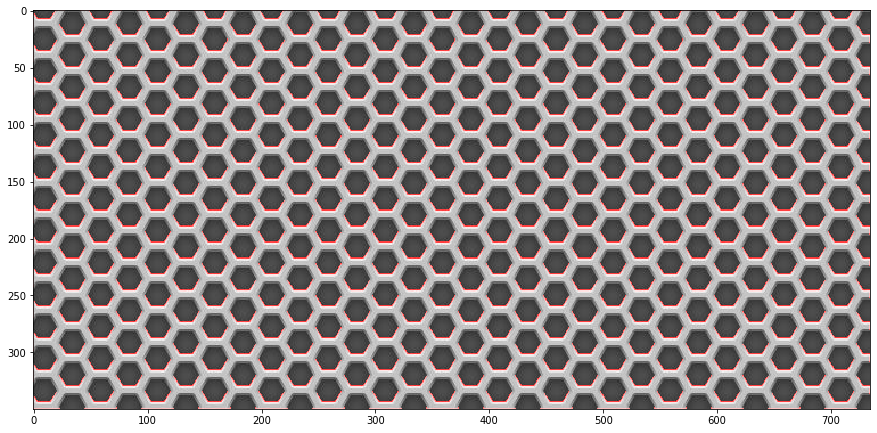

In [9]:
# Make a mask with the values of magnitude of the top 50 percentile and overlap with the original image
mask = metalgrid_magnitude > 0.5
mask = (mask * 255).astype(np.uint8)
metalgrid_color_filtered = np.copy(metalgrid_color)
metalgrid_color_filtered[:, :, 0] = np.maximum(mask, metalgrid_color[:, :, 0])
_, ax = plt.subplots(figsize=(15, 10))
ax.imshow(metalgrid_color_filtered)

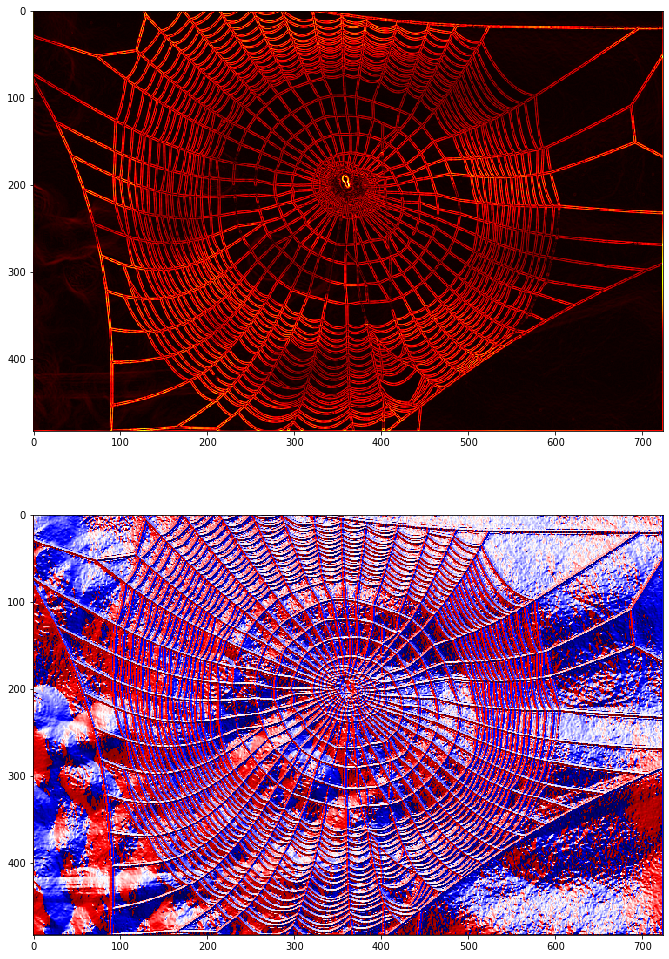

In [6]:
# Load the image to filter and convert it to greyscale: now using the spider web image
web_color = skimage.io.imread('tela2.jpg')
web_gray = skimage.color.rgb2gray(web_color)

# Define the Sobel kernel to be used
k = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Get the horizontal and vertical gradients
x = convolution(web_gray, k)
y = convolution(web_gray, k.T)

# Calculate magnitude and phase
web_magnitude = np.sqrt(x ** 2 + y ** 2)
web_phase = np.rad2deg(np.arctan2(y, x))

# Do the same with the magnitude
web_magnitude = (web_magnitude - np.min(web_magnitude)) / (np.max(web_magnitude) - np.min(web_magnitude))

# Show the images
f, axarr = plt.subplots(2, 1, figsize=(17, 17))
axarr[0].imshow(web_magnitude, cmap='hot')
axarr[1].imshow(web_phase, cmap='seismic')


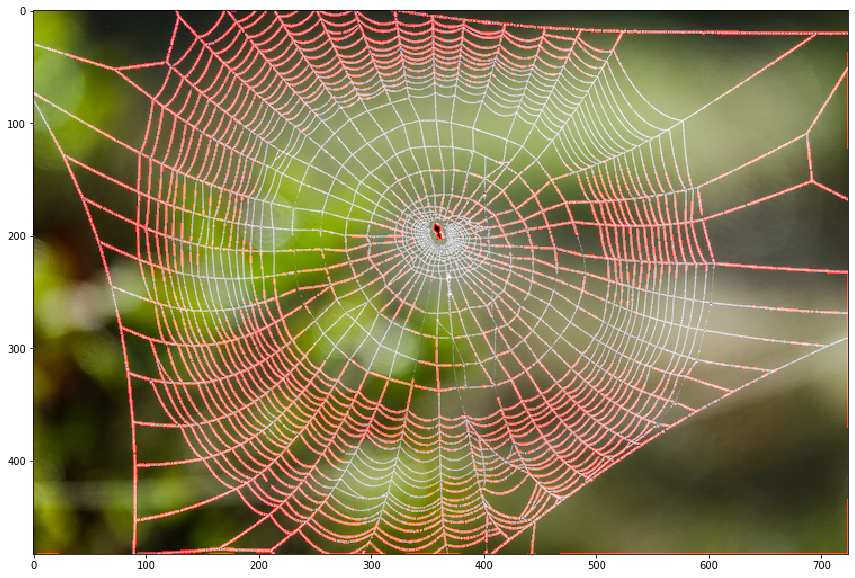

In [10]:
# Make a mask with the values of magnitude of the top 70 percentile and overlap with the original image
mask = web_magnitude > 0.3
mask = (mask * 255).astype(np.uint8)
web_color[:, :, 0] = np.maximum(mask, web_color[:, :, 0])
_, ax = plt.subplots(figsize=(15, 10))
ax.imshow(web_color)

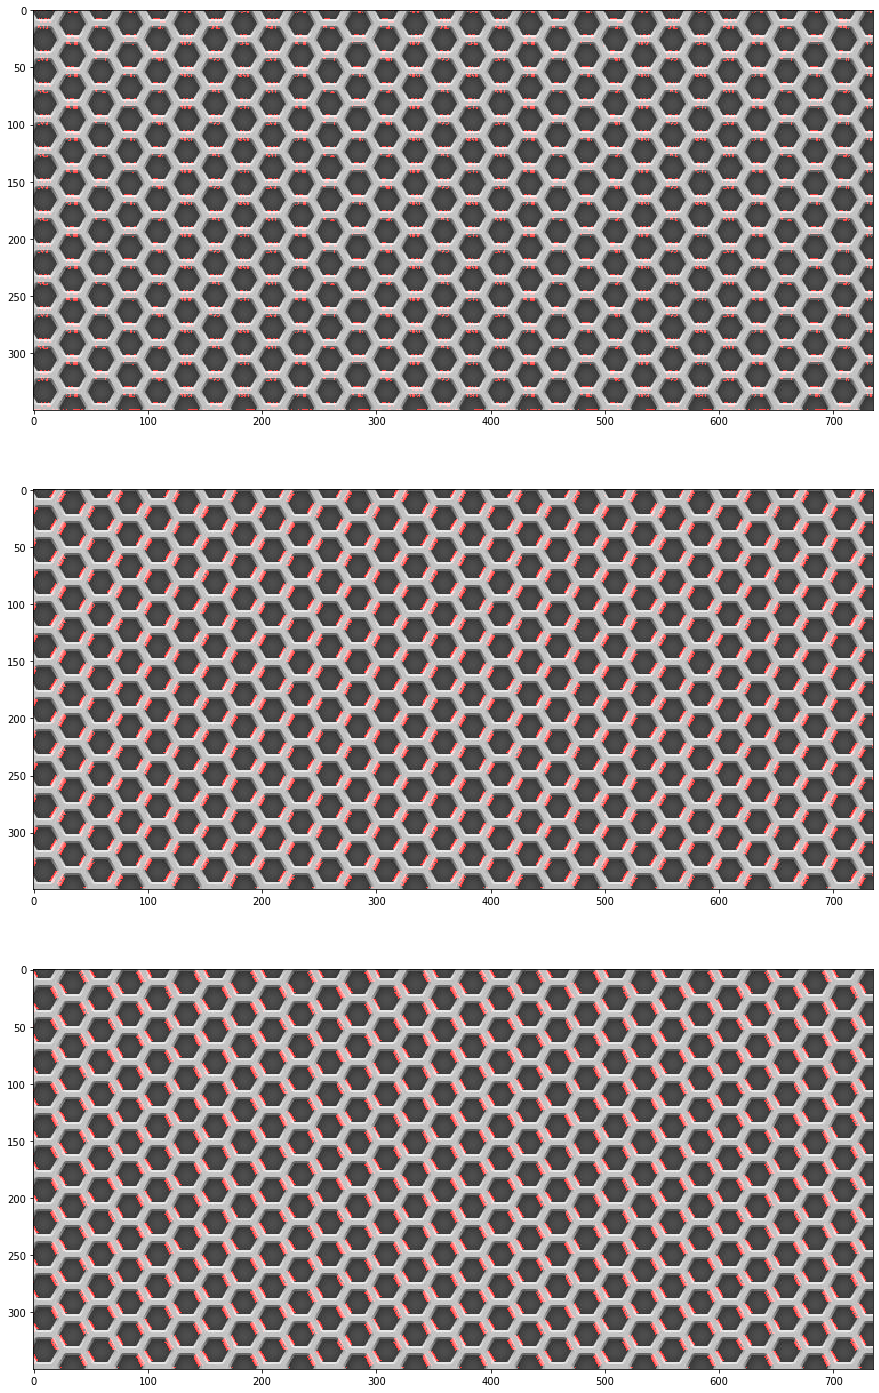

In [11]:
# Now we filter by phase using the metal grid image

# Shift the phase from [-180, 0) to [0, 180), as they both indicate the same direction

mask = metalgrid_phase < 0
offset = np.zeros((mask.shape)) + mask * 180
metalgrid_phase_overlapped = metalgrid_phase + offset

f, axarr = plt.subplots(3, 1, figsize=(30, 25))
target_angles = [0, 60, 120]
tolerance = 10
for i, target_angle in enumerate(target_angles):
    # Make a mask with the values of phase similar to the target angle and overlap with the original image
    mask = (metalgrid_phase_overlapped > target_angle - tolerance) \
        * (metalgrid_phase_overlapped < target_angle + tolerance) * (metalgrid_magnitude > 0.1)
    mask = (mask * 255).astype(np.uint8)
    metalgrid_color_filtered = np.copy(metalgrid_color)
    metalgrid_color_filtered[:, :, 0] = np.maximum(mask, metalgrid_color[:, :, 0])
    axarr[i].imshow(metalgrid_color_filtered)